<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_CV2_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 모듈 불러오기
import numpy as np
from scipy.signal import convolve2d # 2D convolution 연산
from skimage.io import imread, imshow # 데이터를 이미지로 보여주기
from skimage.color import rgb2gray # RGB 채널값을 가진 이미지 데이터를, 흑백 이미지의 데이터로 변환하기

In [2]:
cat = rgb2gray(imread('/content/cat.jpg')) # read image

In [3]:
cat.shape

(3266, 4899)

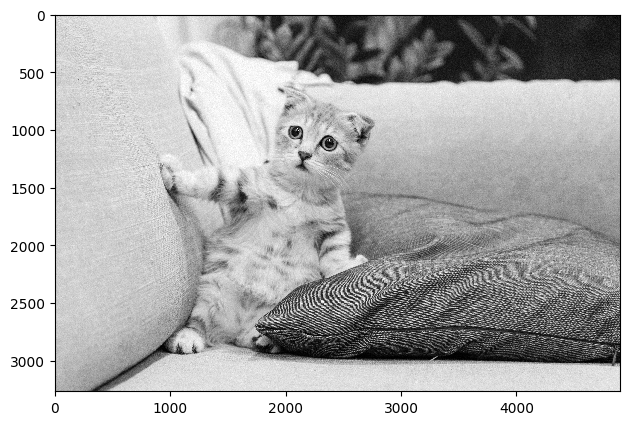

In [4]:
imshow(cat)

In [5]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

In [6]:
edge_im = convolve2d(cat, edge, 'valid')

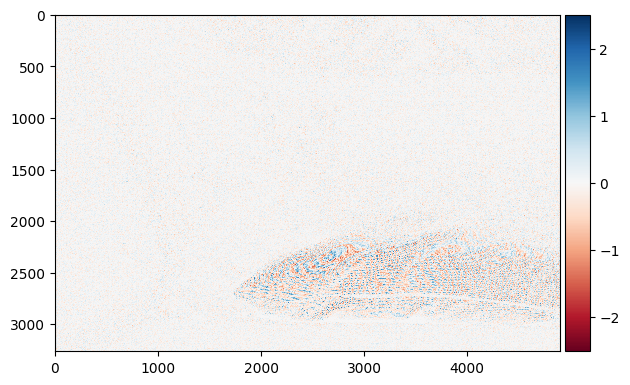

In [7]:
imshow(edge_im)

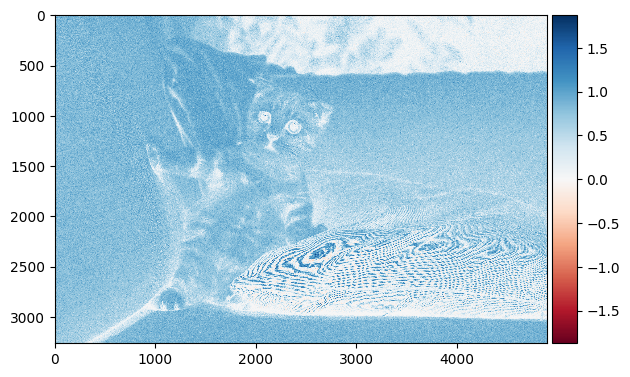

In [8]:
sharp_im = convolve2d(cat, sharpen, 'valid')
imshow(sharp_im)

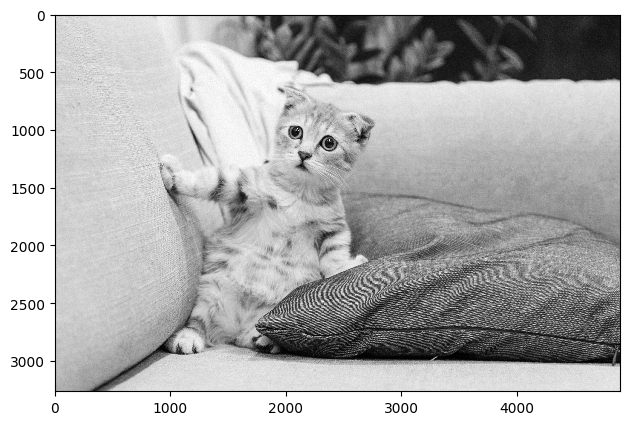

In [9]:
blur_im = convolve2d(cat, blur, 'valid')
imshow(blur_im)

CNN 구조 구현하기
tf.keras 라이브러리를 이용해서 CNN 구조를 구현해봅시다.
2D convolutional layer는 tf.keras.layers.Conv2D 객체를 생성하여 구현할 수 있습니다.
Conv2D 객체의 자료형은 keras.engine.keras_tensor.KerasTensor입니다.
모델을 생성할 때, tf.keras.layers.Input 레이어를 맨 처음에 정의해야 합니다. 여기서는 (28, 28, 1) 크기의 데이터를 입력받는 input layer를 생성했습니다.
input_layer.shape 결과에서 처음 보이는 None은 데이터셋의 batch size에 해당됩니다. x라는 레이어 객체는 output 채널이 4개인 convolutional layer이므로 x.shape의 결과는 (None, 28, 28, 4)가 됩니다.

중요한 점은, 레이어를 생성할 때 output = Conv2D(params)(input) 형태로 input과 output 변수를 넣고, 이전 레이어의 output을 다음 레이어의 input으로 설정함으로써 레이어들이 서로 연결되도록 해야 한다는 것입니다.

In [10]:
import tensorflow as tf
# 가로 28, 세로 28, 채널 수 1의 input 데이터를 받는 input layer 생성하기
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

# 커널의 가로 세로 사이즈는 3이고, 채널 수는 4, zero-padding을 넣고,
# stride는 1로 한 Conv2D layer
x = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)

print(type(x))
print(x)

<class 'keras.src.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [11]:
print(input_layer.shape)
print(x.shape)

(None, 28, 28, 1)
(None, 28, 28, 4)


이번에는 pooling layer가 포함된 CNN 모델을 만들어봅시다.
(27, 27, 1) 크기의 입력을 받는 input_tensor와 Conv2D 레이어 x1, 그리고 pooling layer에 해당하는 MaxPooling2D 레이어 x2로 구성되어 있습니다.

In [12]:
# Q. 가로 27, 세로 27, 채널 수 1의 input 데이터를 받는 input layer 생성해 보세요.
input_tensor = tf.keras.layers.Input(shape=(27, 27, 1))

In [13]:
# Q. 커널의 가로 세로 사이즈는 2이고, 채널 수는 6, zero-padding을 넣고,
# stride는 2인 Conv2D layer x1을 생성해 보세요. (활성화 함수 : relu)
x1 = tf.keras.layers.Conv2D(filters=6, kernel_size=2, strides=2, padding='same', activation='relu')(input_layer)


In [14]:
# 가로 세로 사이즈가 2인 영역에서 최대값을 뽑는 Maxpooling을 적용
x2 = tf.keras.layers.MaxPooling2D(2)(x1)
print(x1)
print(x2)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 6), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 6), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


In [15]:
input_layer = tf.keras.layers.Input(shape=(7, 7, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 7, 5)]         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           184       
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 8)           296       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 8)           0         
 g2D)                                                            
                                                                 
Total params: 480 (1.88 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


CNN 모델을 이미지 분류에 사용하려면, Conv2D 레이어의 output인 3차원 feature map에 flatten을 적용한 다음, fully connected layer(Dense)를 연결해야 합니다.

In [16]:
input_tensor = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 합니다.
x = tf.keras.layers.Flatten()(x)

# Flatten 된 결과를 100의 노드를 가진 Fuly Connected Layer와 연결
x = tf.keras.layers.Dense(100, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

In [17]:
# Q. tf.keras.Model을 사용하여 model을 정의해 주세요. (위에 코드 참고해서 작성해 보세요.)
model = tf.keras.Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           

In [18]:
# Q. 정의해 준 model이 잘 만들어졌는지 summary를 통해 확인해 보세요.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           